<h2 id="import_data"> Import Data</h2>


<h4>Setup</h4>


 Import libraries 


In [56]:
import pandas as pd
import numpy as np

 load data and store in dataframe df:


This dataset was hosted on IBM Cloud object click <a href="https://cocl.us/DA101EN_object_storage">HERE</a> for free storage


In [57]:
path='dataset/car.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,16500.0,11.190476,8.703704,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,13950.0,9.791667,7.833333,Low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,17450.0,13.055556,10.681818,Low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,15250.0,12.368421,9.400000,Low,0,1,1,0


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns using Visualization</h2>


To install seaborn we use the pip which is the python package manager.


In [58]:
%%capture
! pip install seaborn

 Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [60]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [61]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,...,0.074617,0.284033,-0.030158,-0.083327,0.062423,-0.033159,-0.195381,0.195381,0.050995,-0.050995
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,...,0.217322,0.239580,-0.225255,0.133999,0.238712,0.181247,-0.101574,0.101574,0.006915,-0.006915
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,...,0.375610,-0.365045,-0.480029,0.589147,0.484047,0.584953,0.306706,-0.306706,-0.254907,0.254907
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,...,0.580583,-0.286688,-0.667658,0.691044,0.659174,0.708466,0.210616,-0.210616,-0.229294,0.229294
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,...,0.617115,-0.247337,-0.638155,0.752795,0.677111,0.739845,0.243448,-0.243448,-0.304459,0.304459
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,...,-0.085829,-0.315820,-0.057087,0.137284,0.008923,0.088903,0.281198,-0.281198,-0.086531,0.086531
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,...,0.758076,-0.279422,-0.750390,0.834420,0.785868,0.837217,0.221082,-0.221082,-0.322097,0.322097
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,...,0.822689,-0.256681,-0.651002,0.872337,0.745337,0.783593,0.070925,-0.070925,-0.110278,0.110278
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,...,0.566807,-0.267061,-0.581272,0.543433,0.553954,0.558675,0.055395,-0.055395,-0.229338,0.229338
stroke,0.008072,0.055673,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,...,0.100881,-0.066021,-0.040547,0.083298,0.041310,0.051032,0.240046,-0.240046,-0.215805,0.215805


The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


In [62]:
 df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002034,0.566807
stroke,-0.051087,1.000000,0.186780,0.100881
compression-ratio,0.002034,0.186780,1.000000,-0.214260
horsepower,0.566807,0.100881,-0.214260,1.000000


<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>


 Let's see several examples of different linear relationships:


<h4>Positive linear relationship</h4>


Let's find the scatterplot of "engine-size" and "price" 


(0.0, 53234.01879556036)

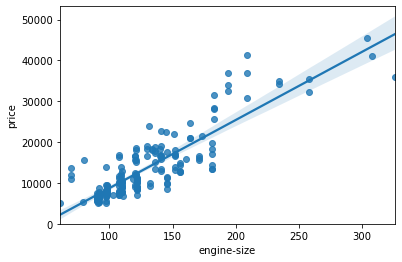

In [63]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87


In [64]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


Highway mpg is a potential predictor variable of price 


<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

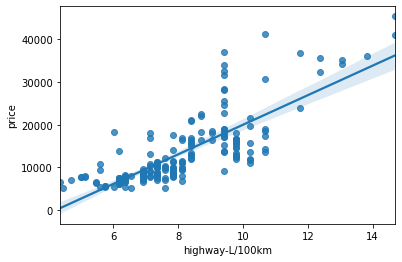

In [65]:
sns.regplot(x="highway-L/100km", y="price", data=df)

<p>As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>


We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately  -0.704


In [66]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801313
price,0.801313,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "Peak-rpm" as a predictor variable of "price".


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

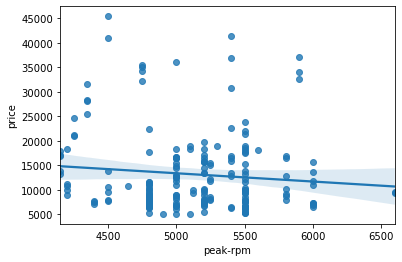

In [67]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616 


In [68]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101593
price,-0.101593,1.000000


In [69]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.083298
price,0.083298,1.000000


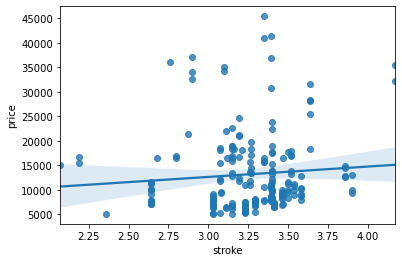

In [70]:
 sns.regplot(x="stroke", y="price", data=df);

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "body-style" and "price".


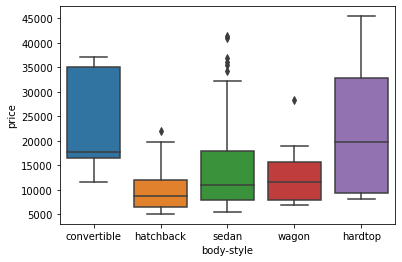

In [71]:
sns.boxplot(x="body-style", y="price", data=df);

<p>We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


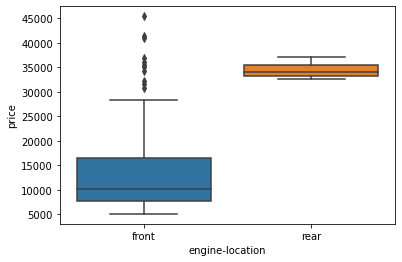

In [72]:
sns.boxplot(x="engine-location", y="price", data=df);

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


 Let's examine "drive-wheels" and "price".


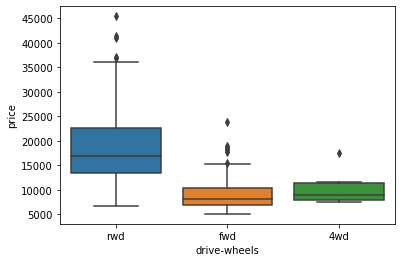

In [73]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df);

<p>Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


 We can apply the method "describe" as follows:


In [74]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.329981,3.259816,...,103.365000,5118.259901,25.200000,13205.690000,9.937914,8.041663,0.100000,0.900000,0.820000,0.180000
std,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,0.314177,...,37.455525,479.240743,6.432487,7966.982558,2.539415,1.844764,0.300753,0.300753,0.385152,0.385152
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,3.117500,...,70.000000,4800.000000,19.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,3.290000,...,95.000000,5162.995050,24.000000,10270.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,...,116.000000,5500.000000,30.000000,16500.750000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [75]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,200,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,197,145,156,91,152


<h3>Value Counts</h3>


<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".</p>


In [76]:
df['drive-wheels'].value_counts()

fwd    118
rwd     74
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a Dataframe as follows :


In [77]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,74
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.


In [78]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,74
4wd,8


 Now let's rename the index to 'drive-wheels':


In [79]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,74
4wd,8


We can repeat the above process for the variable 'engine-location'.


In [80]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,197
rear,3


<p>Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [81]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>


In [82]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.


In [83]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19842.243243


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>


In [84]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [85]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [86]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [87]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


If you did not import "pyplot" let's do it again. 


In [88]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels and Body Style vs Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


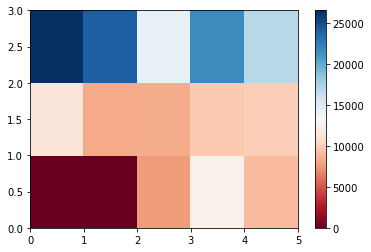

In [89]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


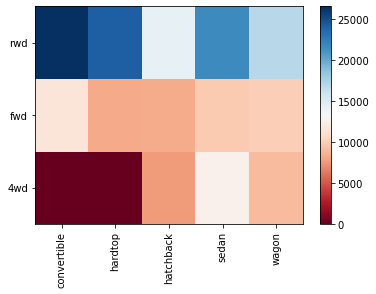

In [90]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python Visualizations course.</p>

<p>The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p3>Pearson Correlation</p>

<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [91]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,...,0.074617,0.284033,-0.030158,-0.083327,0.062423,-0.033159,-0.195381,0.195381,0.050995,-0.050995
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,...,0.217322,0.239580,-0.225255,0.133999,0.238712,0.181247,-0.101574,0.101574,0.006915,-0.006915
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,...,0.375610,-0.365045,-0.480029,0.589147,0.484047,0.584953,0.306706,-0.306706,-0.254907,0.254907
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,...,0.580583,-0.286688,-0.667658,0.691044,0.659174,0.708466,0.210616,-0.210616,-0.229294,0.229294
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,...,0.617115,-0.247337,-0.638155,0.752795,0.677111,0.739845,0.243448,-0.243448,-0.304459,0.304459
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,...,-0.085829,-0.315820,-0.057087,0.137284,0.008923,0.088903,0.281198,-0.281198,-0.086531,0.086531
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,...,0.758076,-0.279422,-0.750390,0.834420,0.785868,0.837217,0.221082,-0.221082,-0.322097,0.322097
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,...,0.822689,-0.256681,-0.651002,0.872337,0.745337,0.783593,0.070925,-0.070925,-0.110278,0.110278
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,...,0.566807,-0.267061,-0.581272,0.543433,0.553954,0.558675,0.055395,-0.055395,-0.229338,0.229338
stroke,0.008072,0.055673,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,...,0.100881,-0.066021,-0.040547,0.083298,0.041310,0.051032,0.240046,-0.240046,-0.215805,0.215805


 sometimes we would like to know the significant of the correlation estimate. 


<b>P-value</b>: 

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


 We can obtain this information using  "stats" module in the "scipy"  library.


In [92]:
from scipy import stats

<h3>Wheel-base vs Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 


In [102]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5891470005448702  with a P-value of P = 4.4570195020504053e-20


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>


<h3>Horsepower vs Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [94]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096565575365611  with a P-value of P =  1.0468839625927006e-47


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>


<h3>Length vs Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [95]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6910440897821906  with a P-value of P =  9.960963222348324e-30


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs Price</h3>


 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [96]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7527948631832609  with a P-value of P = 8.25671414830892e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


### Curb-weight vs Price


 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [97]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344204348498461  with a P-value of P =  3.9699775360220333e-53


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-size vs Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [98]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521142  with a P-value of P = 1.8977171466563487e-63


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [99]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5434325935555682  with a P-value of P =   9.207487524195266e-17


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


 We can relate the process for each 'City-mpg'  and 'Highway-mpg':


<h3>City-mpg vs Price</h3>


In [100]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6871861020862686  with a P-value of P =  2.729256568479228e-29


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs Price</h3>


In [103]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8013130144661038  with a P-value of P =  4.6790420242567935e-46


##### Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Drive Wheels</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>


In [ ]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

In [ ]:
df_gptest

 We can obtain the values of the method group using the method "get_group".  


In [ ]:
grouped_test2.get_group('4wd')['price']

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.


In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 


#### Separately: fwd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

 Let's examine the other groups 


#### 4wd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

<h4>4wd and fwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
